In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('breast-cancer-wisconsin.txt')
df.head(10)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
df.columns


Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epith_cell_size', 'bare_nuclei',
       'Bland_chromatin', 'Normal_nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [5]:
df.isnull().sum()

id                        0
clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
Bland_chromatin           0
Normal_nucleoli           0
Mitoses                   0
class                     0
dtype: int64

In [6]:
df.replace('?',-99999,inplace=True)
df.drop(['id'], axis=1, inplace=True)

In [7]:
df.head(5)

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epith_cell_size,bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
df.isnull().sum()


clump_thickness           0
uniform_cell_size         0
uniform_cell_shape        0
marginal_adhesion         0
single_epith_cell_size    0
bare_nuclei               0
Bland_chromatin           0
Normal_nucleoli           0
Mitoses                   0
class                     0
dtype: int64

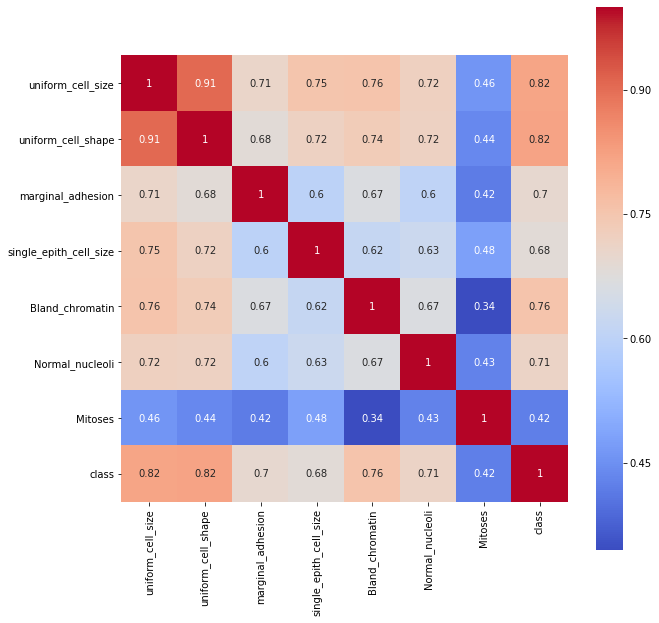

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df[df.columns[1:11]].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [10]:
X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [36]:

clf = neighbors.KNeighborsClassifier(n_jobs=-1, n_neighbors=7)

clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

0.9714285714285714


In [37]:
predict_data = np.array([(2, 1, 2, 1, 2, 1, 3, 1, 1)])

predict_data = predict_data.reshape(len(predict_data), -1)
result = clf.predict(predict_data)

print(result)


[2]


In [38]:
pred = clf.predict(X_test)
pred

array([2, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4,
       2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4,
       4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 4, 4, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4,
       2, 4, 2, 2, 4, 2, 4, 2])

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(pred, y_test)

array([[88,  2],
       [ 2, 48]])

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        90
           4       0.96      0.96      0.96        50

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



# Chossing K Value


In [41]:
error_rate = {}

for i in range(1,41):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    mean = np.mean(pred!=y_test)
    error_rate[i] = mean

Text(0, 0.5, 'ErrorRate')

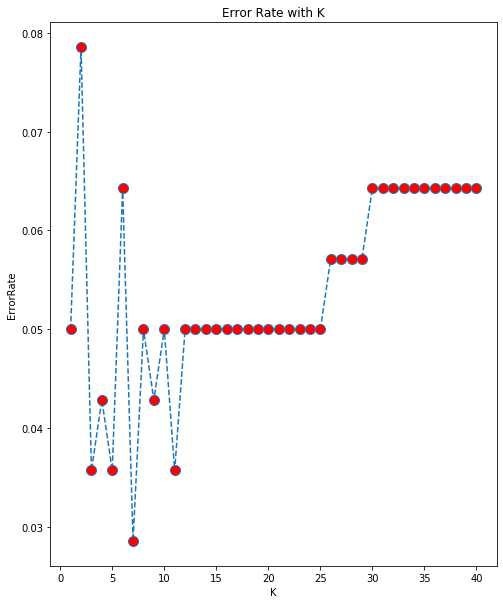

In [33]:
plt.figure(figsize=(8,10))
plt.plot(list(error_rate.keys()), list(error_rate.values()), linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate with K')
plt.xlabel('K')
plt.ylabel('ErrorRate')